<a href="https://colab.research.google.com/github/ravellys/PID/blob/master/Lista7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade \#7 - Filtros Lineares
---
## Universidade Federal de Pernambuco - Departamento de Energia Nuclear
## Processamento de Imagens Digitais
### Aluno - Lucas Ravellys
---

In [ ]:
# Importando bibliotecas
import skimage as sk
import matplotlib.pyplot as plt
import imageio
import numpy as np
import os
from matplotlib import image
import cv2

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from skimage import exposure

# Plotagem Imagem + Histograma
def plot_im_hist(im, bits = 8):
  fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
  ax = axes.ravel()
  ax_cdf = ax[1].twinx()

  ax[0].imshow(im, cmap='gray', vmin =  0, vmax = 2**bits-1)
  ax[0].set_title('Image')
  ax[0].axis('off')

  ax[1].hist(im.ravel(), bins=(im.max()-im.min()), range = (0,  2**bits-1), density = True)
  ax[1].set_title('Histogram')

  img_cdf, bins = exposure.cumulative_distribution(im, nbins = 2**bits )
  ax_cdf.plot(bins, img_cdf, 'r')
  ax_cdf.set_yticks([])

  ax[1].grid(True)
  plt.show()

# Plota várias imagens
def plot_comp_image(ncols, *images): 
  n_images = len(images)

  fig, ax = plt.subplots(ncols = ncols, nrows = round(n_images/ncols), figsize = (12,5))
  ax = ax.ravel()

  for ax_,img in zip(ax,images): 
    ax_.imshow(img,"gray", vmin =  0, vmax = 255)

# Plota imagem e secção horizontal
def im_sec_plot(img,pos = 100):
  leny,lenx = img.shape
  line = img[pos,:]

  x = np.linspace(0,len(line),len(line))
  fig,ax = plt.subplots(ncols=2, figsize = (15,7))
  ax = ax.ravel()

  ax[0].plot(x,line)
  ax[0].grid()

  ax[1].imshow(img,"gray", vmin =  0, vmax = 255)
  ax[1].hlines(pos, 0, lenx,color = 'red')
  ax[1].set_xlim(0, lenx)

  plt.show()    

#altera range dos tons de cinza
def im_alt_range(im, n_min, n_max ):
  min = im.min()
  max = im.max()
  im_ = n_min +(im - min)*(n_max - n_min)/(max - min)
  return im_.astype(int)   

## 1) Use os 4 filtros lineares 2D do DIP para melhorar a imagem CT_Sagital_Ruido.jpg, disponível na aula 9. Comente seus resultados, utilizando gráficos de perfis de linha das imagens de entrada e saída.

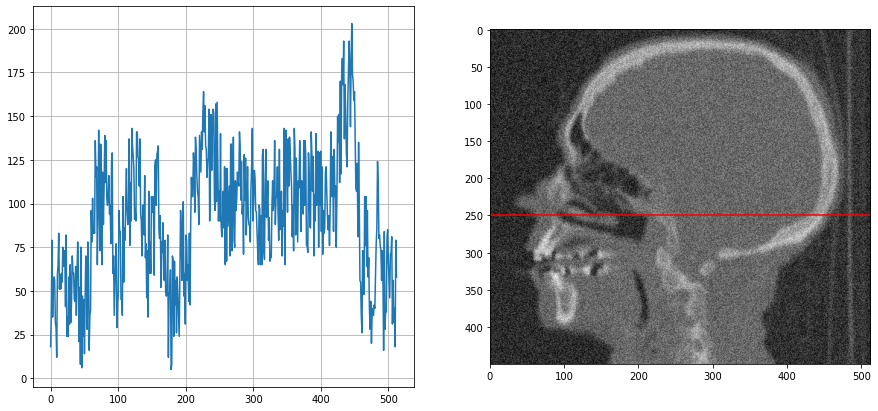

In [ ]:
#importando imagem
from skimage import io
file_ = "/content/drive/My Drive/Classroom/Processamento de Imagens Digitais/Lista 7 - PID/Lista 7/images/CT_Sagital_Ruido.jpg"
im_ruido = (io.imread(file_,as_gray=True)*255).astype(dtype=np.uint8)
im_sec_plot(im_ruido,pos = 250)

Tamanho do Kernel de 3


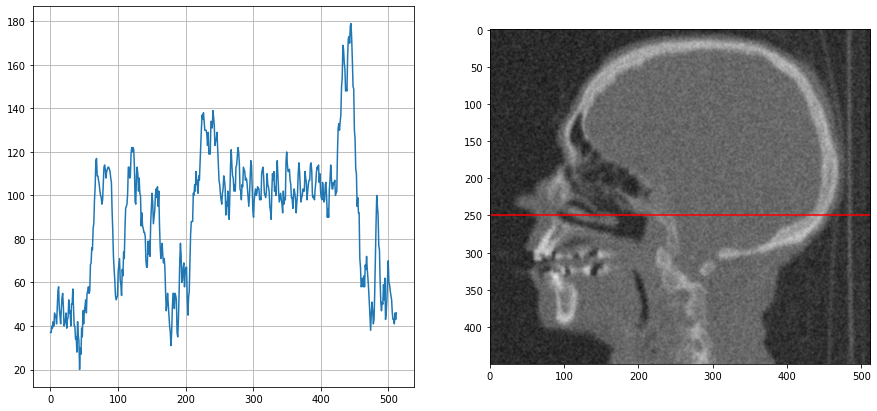

Tamanho do Kernel de 5


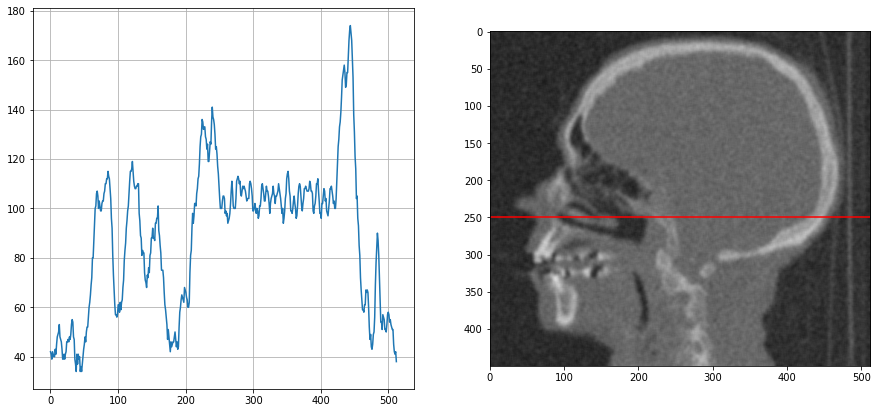

Tamanho do Kernel de 9


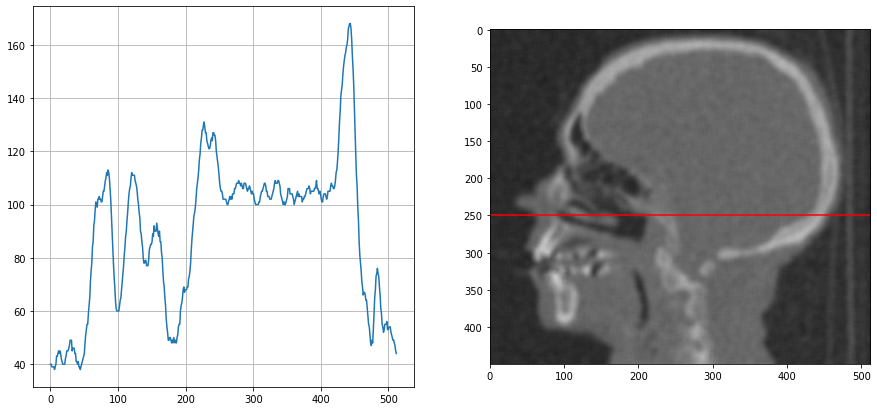

Tamanho do Kernel de 15


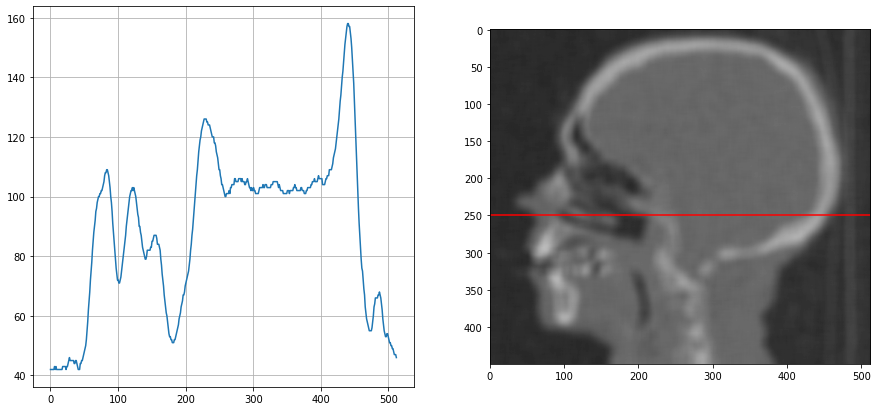

In [ ]:
# Aplicação de FIltro de Média Aritmética

from skimage.morphology import disk, square
from skimage.filters import rank

kernel = [3,5,9,15] # tamanhos das mascaras para convolução
for i in kernel:
  selem = square(i)
  im_normal = rank.mean(im_ruido, selem=selem)
  print(f"Tamanho do Kernel de {i}")
  im_sec_plot(im_normal, pos = 250)

Observa-se que quanto maior o tamanho do filtro menor serão os ruídos na escala de cinza

Tamanho do Kernel de 3


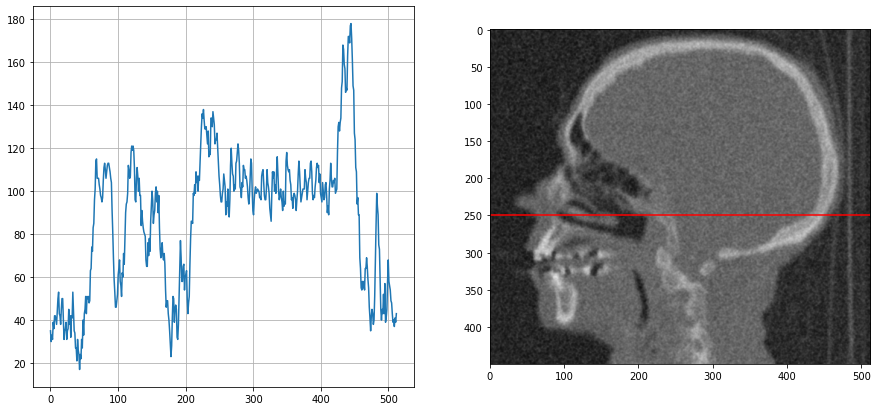

Tamanho do Kernel de 5


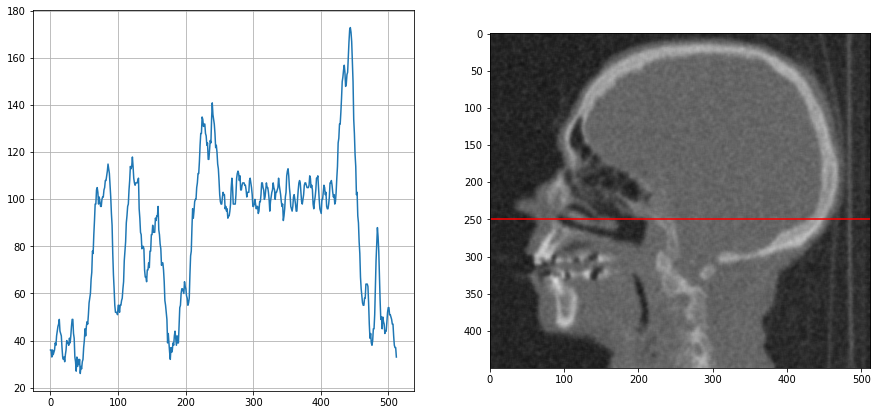

Tamanho do Kernel de 9


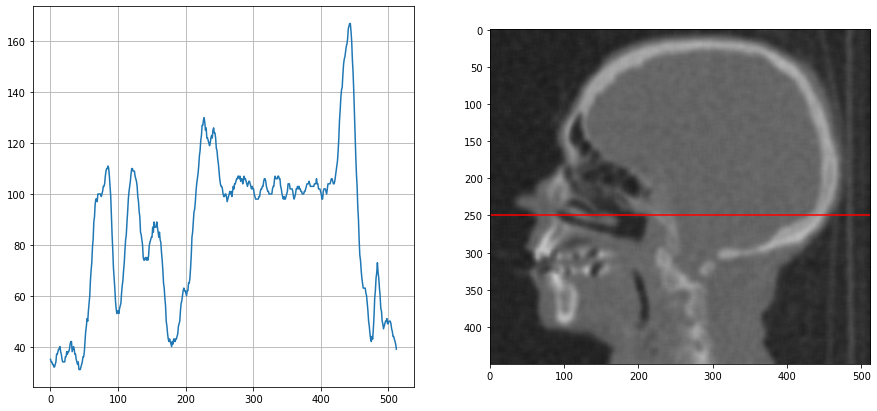

Tamanho do Kernel de 15


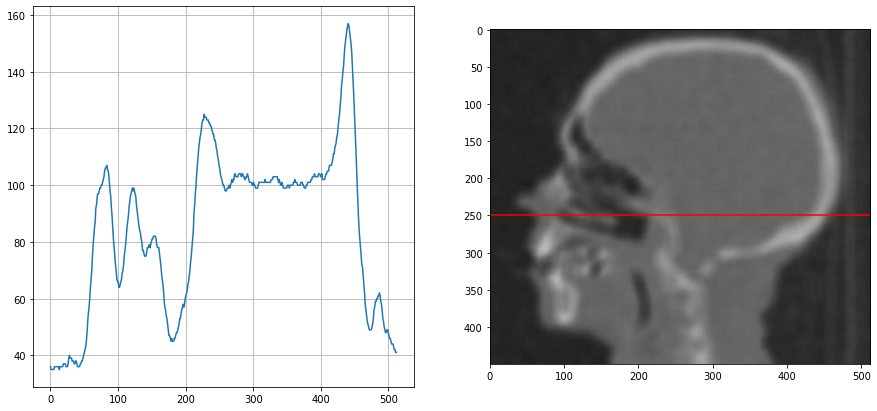

In [ ]:
# Aplicação de FIltro de geométrica
from skimage.morphology import disk, square
from skimage.filters import rank

kernel = [3,5,9,15] # tamanhos das mascaras para convolução
for i in kernel:
  selem = square(i)
  im_normal = rank.geometric_mean(im_ruido, selem=selem)
  print(f"Tamanho do Kernel de {i}")
  im_sec_plot(im_normal, pos = 250)

Nota-se uma suavização do perfil de linha após a aplicação dos filtros de média na imagem com ruído. Todos os métodos mostraram-se eficientes na suavização do ruído. 

## 2) Reproduza as imagens tratadas na aula 9, comentando os resultados obtidos nas filtragens implementadas.

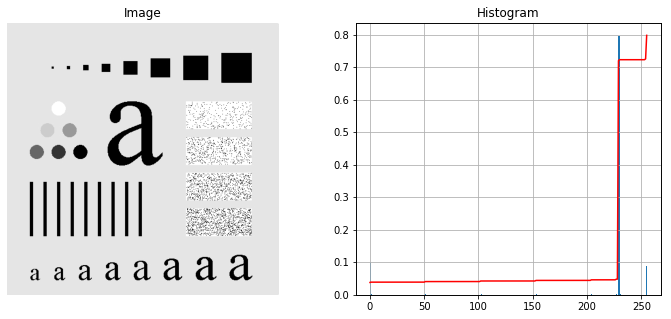

In [ ]:
#importando imagem
from skimage import io
file_ = "/content/drive/My Drive/Classroom/Processamento de Imagens Digitais/Lista 7 - PID/Lista 7/images/DiversosObjetos.jpg"
im_DiversosObjetos = (io.imread(file_,as_gray=True)*255).astype(dtype=np.uint8)
plot_im_hist(im_DiversosObjetos)

Tamanho do Kernel de 3


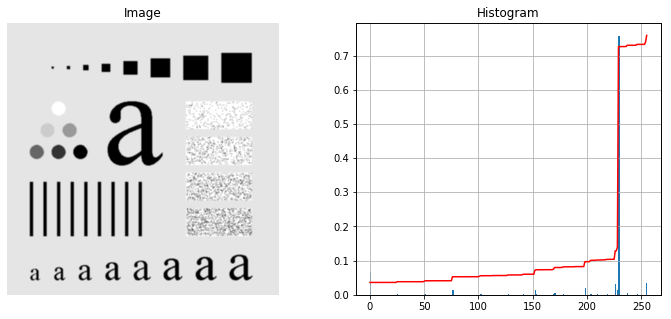

Tamanho do Kernel de 5


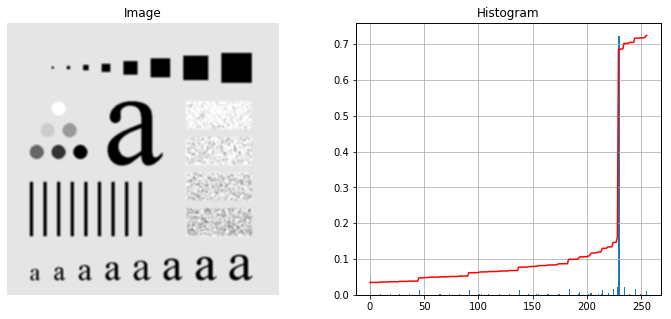

Tamanho do Kernel de 9


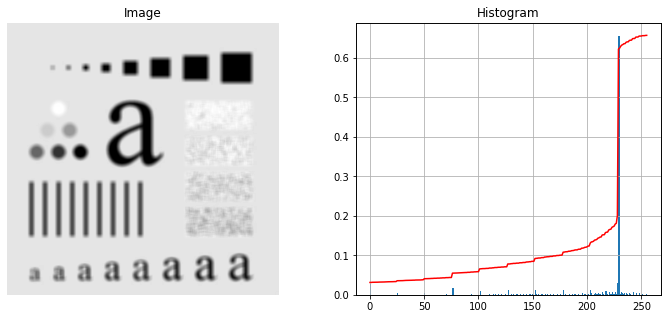

Tamanho do Kernel de 15


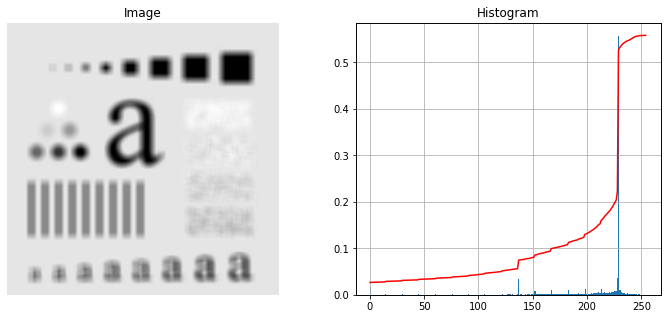

In [ ]:
# Aplicação de FIltro de Média
from skimage.morphology import disk, square
from skimage.filters import rank

kernel = [3,5,9,15] # tamanhos das mascaras para convolução
for i in kernel:
  selem = square(i)
  im_normal = rank.mean(im_DiversosObjetos, selem=selem)
  print(f"Tamanho do Kernel de {i}")
  plot_im_hist(im_normal)

Nota-se que quanto maior o tamanho do filtro maior o efeito do borramento na imagem 

## 3) Faça um estudo teórico (citando as referências usadas) sobre ruídos aleatórios em imagens monocromáticas.

### Definição

O "ruído da imagem" é o equivalente digital da granulação do filme para câmeras analógicas. Para imagens digitais, esse ruído aparece como manchas aleatórias em uma superfície lisa e pode degradar significativamente a qualidade da imagem. Ruídos também podem aumentar a nitidez aparente de uma imagem. O ruído aumenta com a configuração de sensibilidade na câmera, duração da exposição, temperatura e até mesmo varia entre os diferentes modelos de câmera.

### Tipos de ruído de imagem:
Existem diferentes tipos de ruído de imagem. Eles normalmente podem ser divididos em 3 tipos.


![texto do link](https://miro.medium.com/max/487/1*DEfSenS9zPOCRcFbrmX4zQ.png)

1. **Ruído Gaussiano:**
O ruído gaussiano é um ruído estatístico que possui uma função de densidade de probabilidade igual à distribuição normal, também conhecida como distribuição gaussiana. A função Gaussiana aleatória é adicionada à função Imagem para gerar este ruído. Também é chamado de ruído eletrônico porque surge em amplificadores ou detectores.

2. **Ruído de impulso:**
Função de impulso: No mundo discreto, a função de impulso em um valor de 1 em um único local e no mundo contínuo a função de impulso é uma função idealizada com área unitária.

3. **Ruído Poisson:**
O aparecimento deste ruído é visto devido à natureza estatística das ondas eletromagnéticas, como raios X, luzes visíveis e raios gama. As fontes de raios-x e raios gama emitiram um número de fótons por unidade de tempo. Esses raios são injetados no corpo do paciente a partir de sua fonte, em sistemas de imagem de raios x médicos e raios gama. Essas fontes apresentam flutuação aleatória de fótons. A imagem recolhida do resultado tem aleatoriedade espacial e temporal. Esse ruído também é chamado de ruído quântico (fóton) ou ruído de disparo.

4. **Ruído de manchas:**
Um problema fundamental na holografia ótica e digital é a presença de ruído speckle no processo de reconstrução da imagem. Speckle é um ruído granular que existe inerentemente em uma imagem e degrada sua qualidade. O ruído de manchas pode ser gerado pela multiplicação de valores de pixel aleatórios com diferentes pixels de uma imagem.



### Removendo o ruído de uma imagem
Neste exemplo, eliminamos o ruído de uma versão com ruído de uma imagem usando os filtros de variação total, bilateral e wavelet.

1. Filtro de variação total - 
O resultado deste filtro é uma imagem que possui uma norma de variação total mínima, embora seja o mais próximo possível da imagem inicial. A variação total é a norma L1 do gradiente da imagem.

2. Filtro bilateral - 
Um filtro bilateral é um filtro que preserva as bordas e reduz o ruído. Ele calcula a média dos pixels com base em sua proximidade espacial e semelhança radiométrica.

3. **Filtro de eliminação de ruído Wavelet** - 
Um filtro de redução de ruído wavelet depende da representação wavelet da imagem. O ruído é representado por pequenos valores no domínio da wavelet que são definidos como 0.

Imagm com ruído


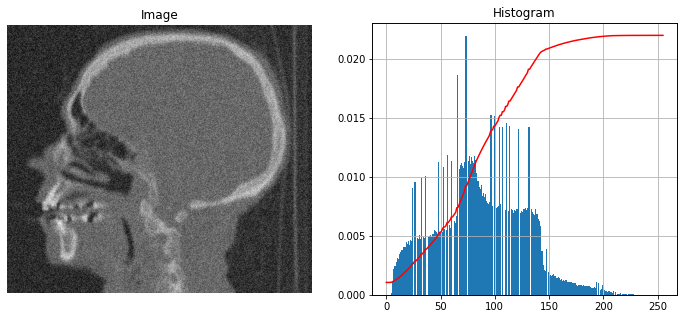

Filtro de variação total


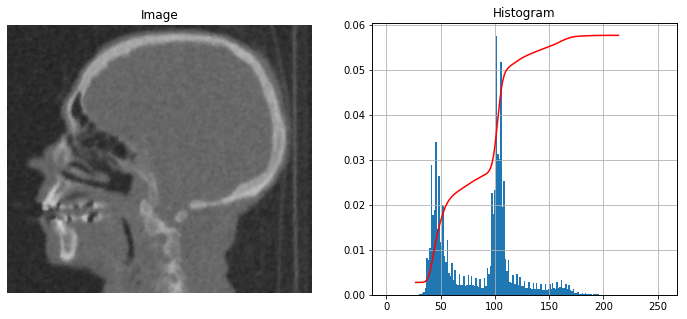

Filtro bilateral


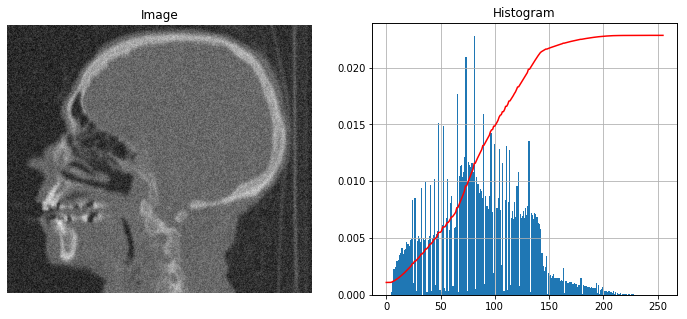

Filtro de eliminação de ruído Wavelet


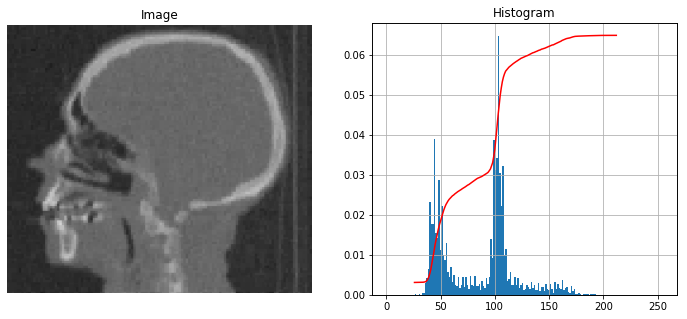

In [ ]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

print(f"Imagm com ruído")
plot_im_hist(im_ruido)
print(f"Filtro de variação total")
plot_im_hist((255*denoise_tv_chambolle(im_ruido)).astype(int))
print(f"Filtro bilateral")
plot_im_hist((255*denoise_bilateral(im_ruido, sigma_color=.05)).astype(int))
print(f"Filtro de eliminação de ruído Wavelet")
plot_im_hist((255*denoise_wavelet(im_ruido, rescale_sigma=True)).astype(int))



### Removendo o ruído com Deep Learning (Autoencoder) 

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load dataset 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


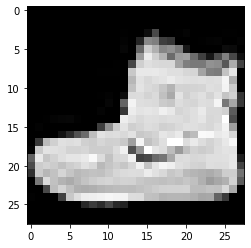

In [ ]:
# Visualize a sample image
plt.imshow(X_train[0], cmap = 'gray')

In [ ]:
# normalize data
X_train = X_train/255
X_test = X_test/255

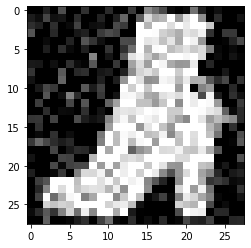

In [ ]:
# add some noise
noise_factor = .2
noise_dataset = []
for img in X_train:
  noisy_image = img + noise_factor*np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0, 1)
  noise_dataset.append(noisy_image)

noise_dataset = np.array(noise_dataset) 
plt.imshow(noise_dataset[11], cmap = 'gray') 

noise_factor = .1
noise_test_dataset = []
for img in X_test:
  noisy_image = img + noise_factor*np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0, 1)
  noise_test_dataset.append(noisy_image)

noise_test_dataset = np.array(noise_test_dataset)  

In [ ]:
# Construindo o modelo de DL

autoencoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (2,2), strides = (2,2), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(8, (3,3), strides = (2,2), padding = 'same', activation = 'relu'),

    tf.keras.layers.Conv2D(8, (3,3), strides = (1,1), padding = 'same', activation = 'relu' ),

    tf.keras.layers.Conv2DTranspose(16, (2,2), strides = (2,2), padding = 'same', activation = 'sigmoid'),
    tf.keras.layers.Conv2DTranspose(1, (3,3), strides = (2,2), padding = 'same', activation = 'sigmoid')
])

autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics = 'acc' )
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 16)        80        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 16)        528       
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 20s 66ms/step - loss: 0.4340 - acc: 0.5029 - val_loss: 0.3292 - val_acc: 0.5027
Epoch 2/10
300/300 [==============================] - 19s 65ms/step - loss: 0.3120 - acc: 0.5059 - val_loss: 0.3019 - val_acc: 0.5050
Epoch 3/10
300/300 [==============================] - 19s 65ms/step - loss: 0.2965 - acc: 0.5074 - val_loss: 0.2920 - val_acc: 0.5059
Epoch 4/10
300/300 [==============================] - 19s 65ms/step - loss: 0.2892 - acc: 0.5081 - val_loss: 0.2854 - val_acc: 0.5063
Epoch 5/10
300/300 [==============================] - 20s 65ms/step - loss: 0.2852 - acc: 0.5084 - val_loss: 0.2820 - val_acc: 0.5064
Epoch 6/10
300/300 [==============================] - 20s 65ms/step - loss: 0.2829 - acc: 0.5086 - val_loss: 0.2796 - val_acc: 0.5066
Epoch 7/10
300/300 [==============================] - 19s 65ms/step - loss: 0.2813 - acc: 0.5087 - val_loss: 0.2784 - val_acc: 0.5068
Epoch 8/10
300/300 [==============================] - 19s 65ms

In [ ]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1))
print("Test Loss -", evaluation[0])
print("Test acc -", evaluation[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.2752 - acc: 0.5070
Test Loss - 0.2751612663269043
Test acc - 0.5070098042488098


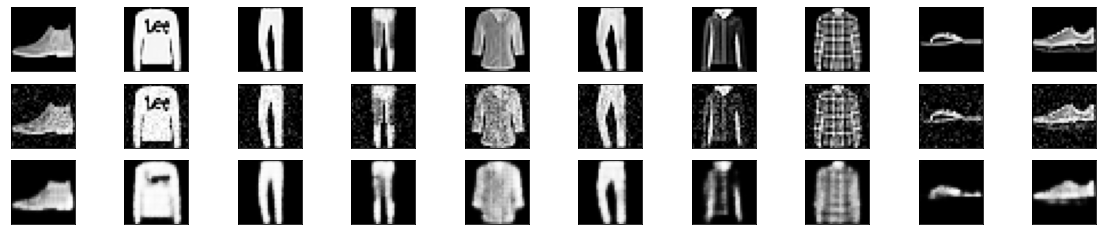

In [ ]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1,28, 28,1))

fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[:10],noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

### Referências
https://medium.com/image-vision/noise-in-digital-image-processing-55357c9fab71

https://scikit-image.org/docs/dev/auto_examples/filters/plot_denoise.html?highlight=gaussian

https://www.cambridgeincolour.com/tutorials/image-noise.htm
